In [1]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
cd ../../

/home/scott/Documents/git/neukrill-net-work


In [4]:
cd ../neukrill-net-work

/home/scott/Documents/git/neukrill-net-work


In [74]:
import os
import sys
import numpy as np
import skimage.io
import PIL.Image

In [6]:
import neukrill_net.utils
import neukrill_net.image_processing
import neukrill_net.augment

In [7]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
def construct_activity_mosaic(layer_activ, pad=1, margin=5, n_rows=None, cval=1.0):
    n_channels, w, h = layer_activ.shape
    if n_rows is None:
        n_rows = int(n_channels**0.5)
    n_cols = int((1.*n_channels)/n_rows)
    assert n_rows * n_cols >= n_channels, "n_rows * n_cols ({0}) < n_channels ({1})".format(n_rows*n_cols, n_channels)
    width = n_cols * (w + pad) - pad + 2 * margin
    height = n_rows * (h + pad) - pad + 2 * margin
    mosaic = cval * np.ones((height, width))
    x, y = margin, margin
    r, c = 0, 0
    for i in range(n_channels):
        mosaic[y:y+h, x:x+w] = layer_activ[i].T
        x += w + pad
        c += 1
        if c == n_cols:
            c = 0
            r += 1
            y += h + pad
            x = margin
    return mosaic

In [23]:
def construct_mosaic_list(X, pad=1, margin=5, n_rows=None, cval=1.0):
    n_channels = len(X)
    w, h = X[0].shape
    if n_rows is None:
        n_rows = int(n_channels**0.5)
    n_cols = int((1.*n_channels)/n_rows)
    assert n_rows * n_cols >= n_channels, "n_rows * n_cols ({0}) < n_channels ({1})".format(n_rows*n_cols, n_channels)
    width = n_cols * (w + pad) - pad + 2 * margin
    height = n_rows * (h + pad) - pad + 2 * margin
    mosaic = cval * np.ones((height, width))
    x, y = margin, margin
    r, c = 0, 0
    for i in range(n_channels):
        mosaic[y:y+h, x:x+w] = X[i].T
        x += w + pad
        c += 1
        if c == n_cols:
            c = 0
            r += 1
            y += h + pad
            x = margin
    return mosaic

In [82]:
def construct_mosaic_list_list(X, pad=1, margin=5, transpose_rows=False, cval=1.0):
    n0 = len(X)
    n1 = len(X[0])
    w, h = X[0][0].shape
    if transpose_rows:
        n_rows = n1
        n_cols = n0
    else:
        n_rows = n0
        n_cols = n1
    width = n_rows * (w + pad) - pad + 2 * margin
    height = n_cols * (h + pad) - pad + 2 * margin
    mosaic = cval * np.ones((height, width))
    for i in range(n_rows):
        for j in range(n_cols):
            x = i * (w + pad) + margin
            y = j * (h + pad) + margin
            if transpose_rows:
                mosaic[y:y+h, x:x+w] = X[j][i]
            else:
                mosaic[y:y+h, x:x+w] = X[i][j]
    
    return mosaic

In [9]:
settings = neukrill_net.utils.Settings('settings.json')

In [10]:
X,y = settings.flattened_train_paths(settings.classes)

In [11]:
X_,y_ = neukrill_net.utils.load_rawdata(settings.image_fnames, classes=settings.classes, verbose=False)

In [24]:
X_ = np.asarray(X_)

In [113]:
n_images = 15
out_size = (48,48)

In [114]:
rng = np.random.RandomState(2)
indices = rng.randint(0,len(X),n_images)

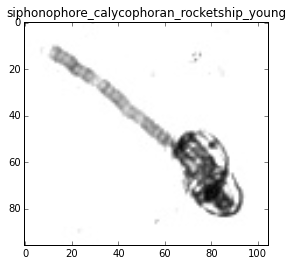

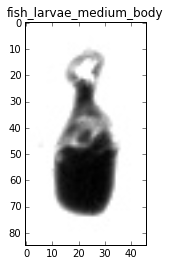

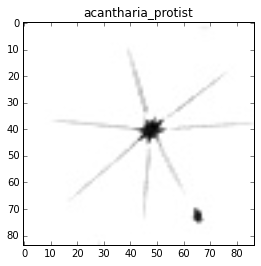

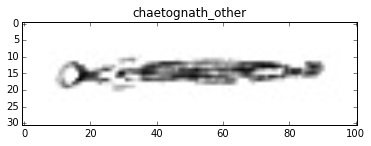

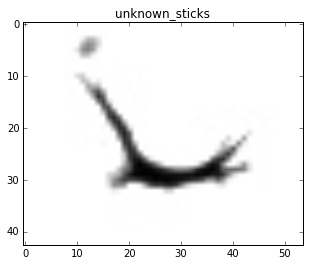

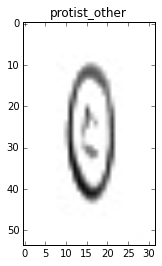

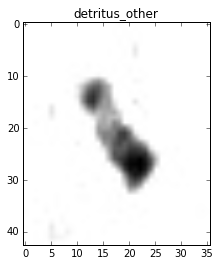

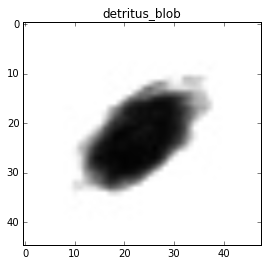

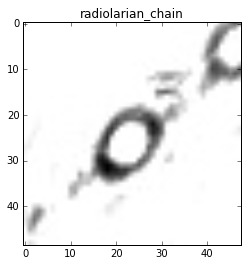

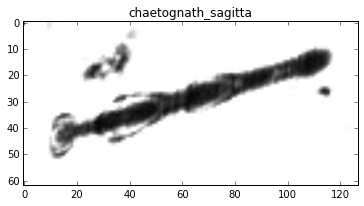

In [20]:
for i in indices:
    iplot = plt.imshow(X_[i])
    iplot.set_cmap('gray')
    plt.title(y_[i])
    show()

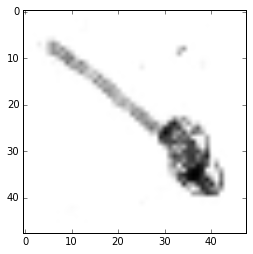

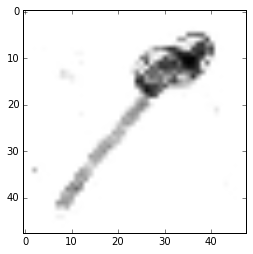

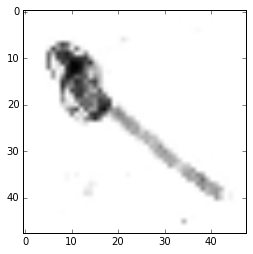

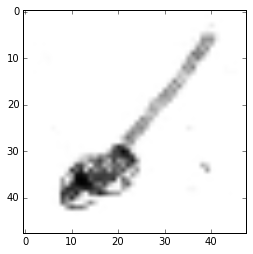

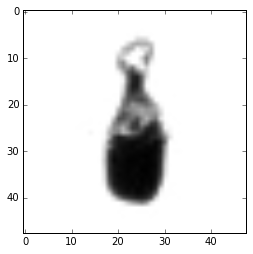

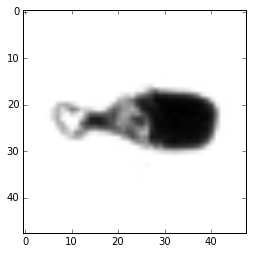

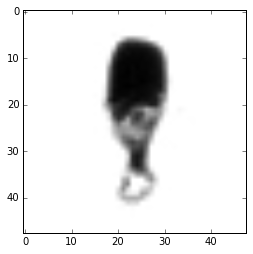

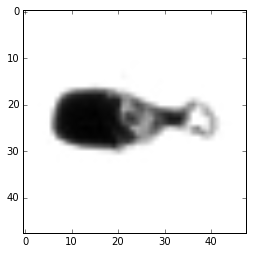

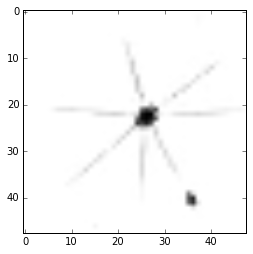

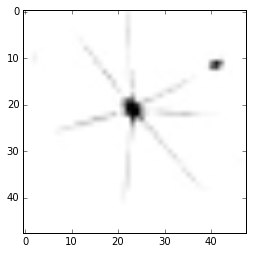

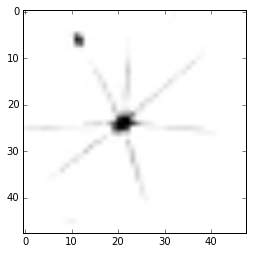

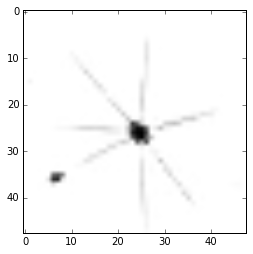

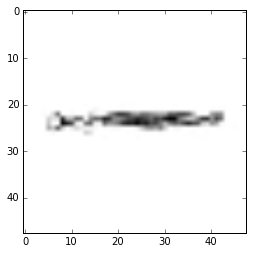

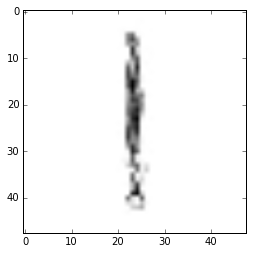

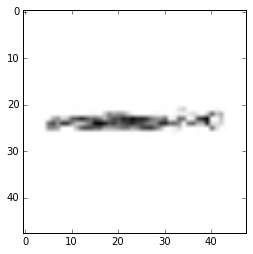

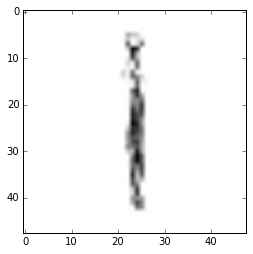

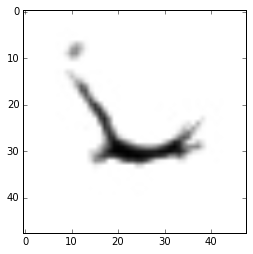

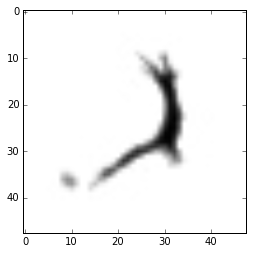

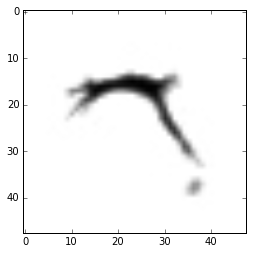

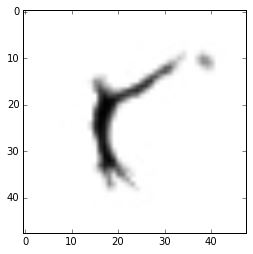

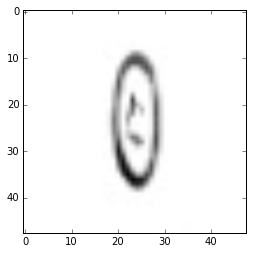

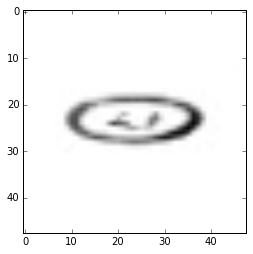

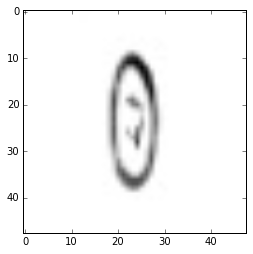

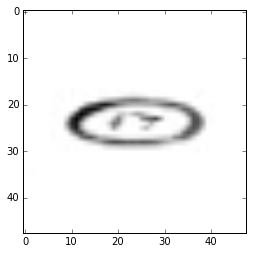

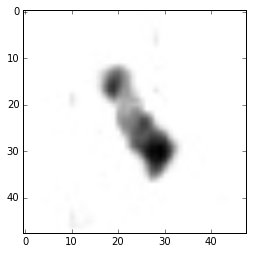

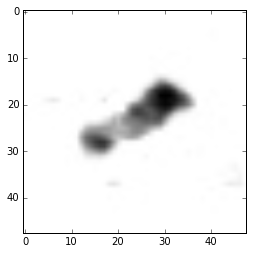

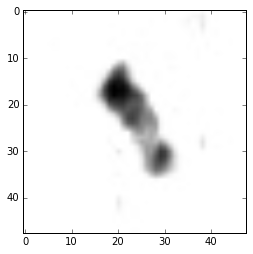

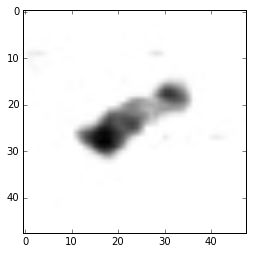

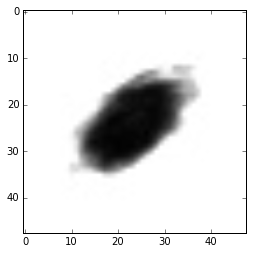

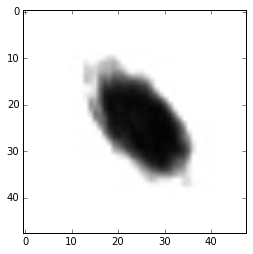

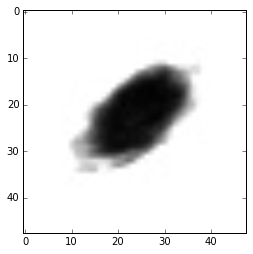

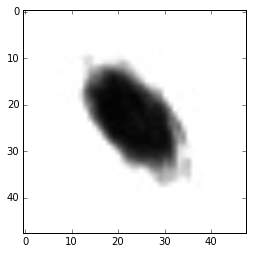

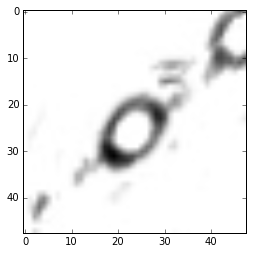

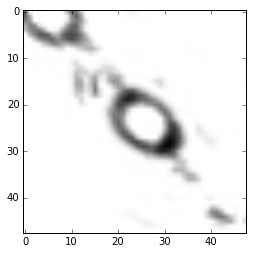

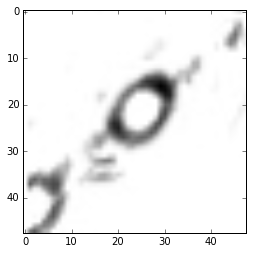

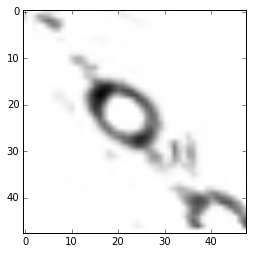

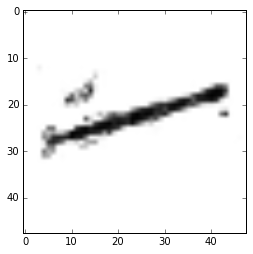

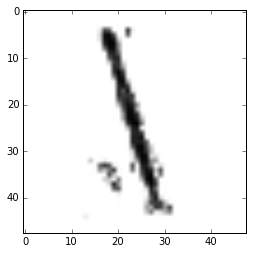

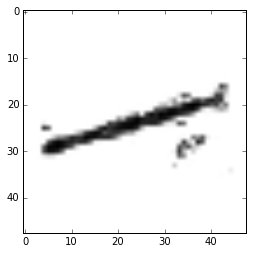

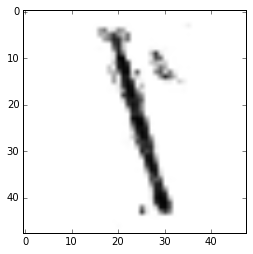

In [33]:
processingFunction = neukrill_net.augment.augmentation_wrapper(units='float',
                                                               resize=(48,48),
                                                               rotate=4,
                                                               rotate_is_resizable=0,
                                                               )

imList = []
for i in indices:
    imList += processingFunction(X_[i])
for augImg in imList:
    iplot = plt.imshow(augImg)
    iplot.set_cmap('gray')
    show()

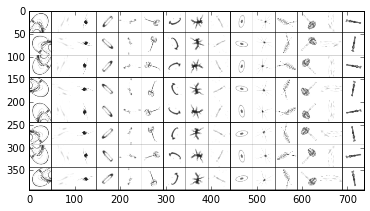

In [115]:
processingFunction = neukrill_net.augment.augmentation_wrapper(units='float',
                                                               resize=(48,48),
                                                               rotate=4,
                                                               rotate_is_resizable=0,
                                                               flip=1
                                                               )

imList = []
for i in indices:
    imList += [processingFunction(X_[i])]

M = construct_mosaic_list_list(imList, margin=1, cval=0)
p = plt.imshow(M)
p.set_cmap('gray')
show()

im = PIL.Image.fromarray(M * 255)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save('report/eight_aug_fig.png', format='png')

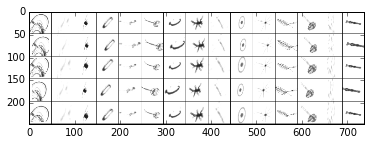

In [116]:
processingFunction = neukrill_net.augment.augmentation_wrapper(units='float',
                                                               resize=(48,48),
                                                               crop=1
                                                               )

imList = []
for i in indices:
    imList += [processingFunction(X_[i])]

M = construct_mosaic_list_list(imList, margin=1, cval=0)
p = plt.imshow(M)
p.set_cmap('gray')

im = PIL.Image.fromarray(M * 255)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save('report/crop_aug_fig.png', format='png')

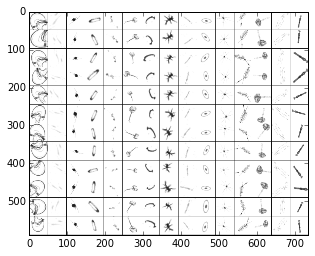

In [117]:
num_augmentations = 12

augFunc = neukrill_net.augment.RandomAugment(units='float64',
                                flip=1,
                                shear=6,
                                rotate=-1,
                                scale=0.1,
                                scale_asym=0.01,
                                shunt=0.05,
                                resize=(48,48))


imList = []
for i in indices:
    imList += [[augFunc(X_[i]) for j in range(num_augmentations)]]

M = construct_mosaic_list_list(imList, margin=1, cval=0)
p = plt.imshow(M)
p.set_cmap('gray')

im = PIL.Image.fromarray(M * 255)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save('report/rand_aug_fig.png', format='png')